### Assignment 2: Dimensionality Reduction, Visualization, and Classification Performance on Mushroom Dataset

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
sns.set_palette("colorblind")

 Successfully downloaded the **mushroom dataset**


In [2]:
path= kagglehub.dataset_download("uciml/mushroom-classification")
df=pd.read_csv(path + "/mushrooms.csv")
pd.set_option('display.max_columns',None)
df.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


#### Mushroom Dataset

The **Mushroom Dataset** is a well-known dataset from the UCI Machine Learning Repository.  
It contains information about **8,124 mushroom samples**, each described by **23 categorical attributes** such as cap shape, cap surface, odor, gill size, stalk color, and habitat.

The main goal is to classify mushrooms into **two categories**:
- **Edible (e)**
- **Poisonous (p)**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [4]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

#### Data Quality

- The dataset contains **no missing values**.  
- Every row has a complete set of feature values

In [5]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


#### Unique Feature Counts per Column

| Feature Name           | Unique Values |
|-------------------------|---------------|
| cap-shape              | 6             |
| cap-surface            | 4             |
| cap-color              | 10            |
| bruises                | 2             |
| odor                   | 9             |
| gill-attachment        | 2             |
| gill-spacing           | 2             |
| gill-size              | 2             |
| gill-color             | 12            |
| stalk-shape            | 2             |
| stalk-root             | 5             |
| stalk-surface-above-ring | 4           |
| stalk-surface-below-ring | 4           |
| stalk-color-above-ring | 9             |
| stalk-color-below-ring | 9             |
| veil-type              | 1             |
| veil-color             | 4             |
| ring-number            | 3             |
| ring-type              | 8             |
| spore-print-color      | 9             |
| population             | 6             |
| habitat                | 7             |

In [6]:
df_new=pd.get_dummies(df).astype(int)
df_new.head(5)

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_f,bruises_t,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_a,gill-attachment_f,gill-spacing_c,gill-spacing_w,gill-size_b,gill-size_n,gill-color_b,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stalk-shape_e,stalk-shape_t,stalk-root_?,stalk-root_b,stalk-root_c,stalk-root_e,stalk-root_r,stalk-surface-above-ring_f,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-surface-below-ring_f,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,stalk-color-above-ring_b,stalk-color-above-ring_c,stalk-color-above-ring_e,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,stalk-color-below-ring_b,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-type_p,veil-color_n,veil-color_o,veil-color_w,veil-color_y,ring-number_n,ring-number_o,ring-number_t,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_a,population_c,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [7]:
df_x=df_new.drop(['class_e','class_p'],axis=1)
df_y=df_new['class_e']

#### After One-Hot Encoding

- Since all features in the Mushroom dataset are **categorical**, we apply **One-Hot Encoding** to convert them into numerical format.  
- After encoding, the dataset expands from **23 features** to **117 columns** .  
- Each categorical level is represented as a separate binary column

In [8]:
df_x.head(5)

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_f,bruises_t,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_a,gill-attachment_f,gill-spacing_c,gill-spacing_w,gill-size_b,gill-size_n,gill-color_b,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stalk-shape_e,stalk-shape_t,stalk-root_?,stalk-root_b,stalk-root_c,stalk-root_e,stalk-root_r,stalk-surface-above-ring_f,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-surface-below-ring_f,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,stalk-color-above-ring_b,stalk-color-above-ring_c,stalk-color-above-ring_e,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,stalk-color-below-ring_b,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-type_p,veil-color_n,veil-color_o,veil-color_w,veil-color_y,ring-number_n,ring-number_o,ring-number_t,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_a,population_c,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [9]:
df_y.head(5)

0    0
1    1
2    1
3    0
4    1
Name: class_e, dtype: int64

#### Feature and Target Separation

- After applying **One-Hot Encoding**, the dataset has **117 feature columns (X)**.  
- The **target column (y)** is the class label, which indicates whether a mushroom is **Edible (e)** or **Poisonous (p)**.  
- Thus:
  - **X** → Encoded features (117 columns)  
  - **y** → Class (1 column)  

In [10]:
print("Dimensions before Applying one-hotencoding:",df.shape)
print("Dimensions After Applying one-hotencoding:",df_new.shape)
print("Increase in number of features after applying one-hotencoding:",df_new.shape[1]-df.shape[1])

Dimensions before Applying one-hotencoding: (8124, 23)
Dimensions After Applying one-hotencoding: (8124, 119)
Increase in number of features after applying one-hotencoding: 96


#### Dimesion observation before and after one-hot encoding
- **Dimensions before Applying one-hotencoding**: (8124, 23)
- **Dimensions After Applying one-hotencoding**: (8124, 119)
- **Increase in number of features after applying one-hotencoding**: 96

In [11]:
import sklearn
from sklearn.preprocessing import StandardScaler

In [12]:
scaler=StandardScaler()
scaled=scaler.fit_transform(df_x)
df_x=pd.DataFrame(scaled,columns=df_x.columns)


In [13]:
df_x.head(5)

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_f,bruises_t,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_a,gill-attachment_f,gill-spacing_c,gill-spacing_w,gill-size_b,gill-size_n,gill-color_b,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stalk-shape_e,stalk-shape_t,stalk-root_?,stalk-root_b,stalk-root_c,stalk-root_e,stalk-root_r,stalk-surface-above-ring_f,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-surface-below-ring_f,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,stalk-color-above-ring_b,stalk-color-above-ring_c,stalk-color-above-ring_e,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,stalk-color-below-ring_b,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-type_p,veil-color_n,veil-color_o,veil-color_w,veil-color_y,ring-number_n,ring-number_o,ring-number_t,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_a,population_c,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,-0.242725,-0.022195,-0.79621,-0.336878,-0.062885,1.105487,-0.632238,-0.022195,1.475942,-0.815325,-0.145314,-0.073794,-0.475867,-0.541117,1.599036,-0.134332,-0.044423,-0.044423,-0.383158,-0.389889,-1.185917,1.185917,-0.227567,-0.155582,-0.601808,-0.227567,-0.066716,-0.876142,5.543859,-0.276246,-0.276246,-0.162896,0.162896,0.438864,-0.438864,-1.494683,1.494683,-0.519778,-0.109353,-0.319386,-0.314684,4.348766,-0.384846,-0.089109,-0.47431,-0.054433,-0.2539,-0.416712,-0.103437,1.144806,-1.144806,-0.662876,-0.931904,-0.271048,2.500714,-0.155582,-0.27,-0.642167,0.754687,-0.054433,-0.282391,-0.629187,0.803659,-0.190327,-0.236986,-0.066716,-0.109353,-0.276246,-0.241586,-0.155582,-0.547197,0.905479,-0.031396,-0.236986,-0.066716,-0.109353,-0.276246,-0.25935,-0.155582,-0.547197,0.923635,-0.054433,0.0,-0.109353,-0.109353,0.15887,-0.031396,-0.066716,0.291438,-0.282391,-0.720467,-0.077094,-0.435668,-0.066716,1.023415,-0.077094,-0.501384,1.827497,-0.565410,-0.077094,-0.094562,-0.077094,-0.645227,-0.077094,-0.222738,-0.208996,-0.227567,2.347257,-0.994599,-0.51672,-0.795385,-0.599531,-0.337783,-0.193088,-0.404842,4.590870,-0.155582
1,-0.242725,-0.022195,-0.79621,-0.336878,-0.062885,1.105487,-0.632238,-0.022195,1.475942,-0.815325,-0.145314,-0.073794,-0.475867,-0.541117,-0.625377,-0.134332,-0.044423,-0.044423,-0.383158,2.564831,-1.185917,1.185917,4.394315,-0.155582,-0.601808,-0.227567,-0.066716,-0.876142,-0.180380,-0.276246,-0.276246,-0.162896,0.162896,0.438864,-0.438864,0.669038,-0.669038,-0.519778,-0.109353,-0.319386,-0.314684,4.348766,-0.384846,-0.089109,-0.47431,-0.054433,-0.2539,-0.416712,-0.103437,1.144806,-1.144806,-0.662876,-0.931904,3.689378,-0.399886,-0.155582,-0.27,-0.642167,0.754687,-0.054433,-0.282391,-0.629187,0.803659,-0.190327,-0.236986,-0.066716,-0.109353,-0.276246,-0.241586,-0.155582,-0.547197,0.905479,-0.031396,-0.236986,-0.066716,-0.109353,-0.276246,-0.25935,-0.155582,-0.547197,0.923635,-0.054433,0.0,-0.109353,-0.109353,0.15887,-0.031396,-0.066716,0.291438,-0.282391,-0.720467,-0.077094,-0.435668,-0.066716,1.023415,-0.077094,-0.501384,-0.547197,1.768629,-0.077094,-0.094562,-0.077094,-0.645227,-0.077094,-0.222738,-0.208996,4.394315

#### Standardization of Encoded Data

- After applying **One-Hot Encoding**, all 117 feature columns are in binary (0/1) form.    
- This transforms the features such that:
  - Each column has **mean = 0**  
  - Each column has **standard deviation = 1**  
- The standardized data is then ready for model training and dimensionality reduction. 

#### Standardizing One-Hot Encoded Features is  Useful Before PCA
1. **Equal Variance Contribution**  
   - PCA is variance-based: it finds directions (components) that maximize variance in the data.  
   - In one-hot encoding, the variance of a dummy feature depends on the proportion of 1s vs 0s.
      Example:  A feature where 50% values are 1 and 50% are 0 has variance = 0.25.  
                A feature where only 1% values are 1 has variance ≈ 0.01.    
   - Without standardization, high-variance dummy columns dominate PCA, while rare-category features are almost ignored.

2. **Balanced Influence of Rare vs Common Categories**  
   - Some mushroom features (e.g., common color) may have balanced splits, while others (e.g., rare odor) may be skewed.  
   - Standardization rescales them so **rare but potentially important categories** still contribute to principal components.

3. **Better Numerical Stability**   
   - If features have very different variances, this can cause **numerical instability** in the decomposition.  
   - Standardization improves stability and produces more balanced components.

In [14]:
from sklearn.decomposition import PCA
pca=PCA()
pcaed=pca.fit_transform(df_x)
row,columns=df_x.shape
column_names=[f"PC{i+1}" for i in range(columns)]
df_x_pca=pd.DataFrame(pcaed,columns=column_names)
df_x_pca.head(5)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64,PC65,PC66,PC67,PC68,PC69,PC70,PC71,PC72,PC73,PC74,PC75,PC76,PC77,PC78,PC79,PC80,PC81,PC82,PC83,PC84,PC85,PC86,PC87,PC88,PC89,PC90,PC91,PC92,PC93,PC94,PC95,PC96,PC97,PC98,PC99,PC100,PC101,PC102,PC103,PC104,PC105,PC106,PC107,PC108,PC109,PC110,PC111,PC112,PC113,PC114,PC115,PC116,PC117
0,3.284737,1.020105,1.353591,-1.361726,-0.478375,-0.486227,-2.988416,-1.085874,4.908155,4.233882,-1.561323,-2.155864,-1.223383,-3.001372,-1.008124,2.474360,0.094191,-0.065199,1.462391,0.411088,-0.977218,1.012120,0.522842,-0.651885,0.626252,-1.039469e-14,-1.759904,-0.298708,1.712081e-14,-0.213257,3.097535e-14,1.748044e-14,5.868503e-15,-2.904050e-14,0.006807,0.637247,-0.461234,0.271021,0.833801,0.556621,1.541009,0.472998,0.742095,-0.231228,-0.344674,-0.499488,-1.319541,1.413750,1.306765,0.818898,0.110717,0.273166,-0.478031,-1.194592,0.696284,0.685543,0.592376,0.082934,0.564182,-0.326491,-0.169633,-0.346876,-0.086923,-0.746103,-0.449032,0.045657,-0.450493,0.205633,0.389582,-0.147984,-0.363454,0.282433,0.709122,0.775212,-0.222788,0.381555,0.250130,0.090075,-0.106689,-0.165373,-0.430420,0.079825,-0.172195,0.024615,0.006436,-3.268421e-15,1.955766e-14,5.031615e-15,8.170660e-15,-6.163862e-15,-2.107068e-15,9.046342e-15,1.322816e-14,-7.808911e-15,7.992122e-15,1.987521e-14,1.201537e-15,1.631349e-14,-6.012034e-15,-2.797852e-15,-3.664276e-15,6.960245e-15,8.961836e-15,1.444515e-15,9.236104e-16,6.637990e-15,4.380491e-15,2.887643e-15,8.953343e-15,-4.154362e-15,-1.495276e-14,2.031688e-14,2.885887e-14,1.222270e-14,3.600473e-15,-1.073339e-15,-8.505760e-15
1,3.969481,-0.856895,-0.237503,-1.903058,1.281135,-2.193247,-4.367826,-0.494000,-0.960146,-1.858999,-1.168269,-1.876365,1.787589,-0.266192,-0.316300,0.258171,0.444621,-0.034301,-1.966128,0.177923,-0.427526,0.040704,1.334999,-0.154129,0.036570,2.080045e-14,-1.224919,-1.143954,3.268164e+00,0.303026,-5.181007e-14,-4.659137e-14,1.136976e-14,5.993156e-14,0.372312,-0.175321,-1.038498,-0.440208,-1.261919,-0.914380,1.537730,1.114419,0.605442,0.402342,-0.265894,-1.692688,-2.490541,1.712418,1.051422,-1.105936,-0.880207,-0.254808,0.953946,-0.626160,-1.015111,-1.696877,0.755927,-0.142432,0.346024,0.813577,-0.317613,-0.135180,0.134659,0.562129,0.158048,-0.137416,-0.200160,0.638004,-0.315858,0.934389,-0.830484,0.424462,0.210768,0.512099,-0.101653,0.043554,0.060607,0.004358,-0.022359,-0.180729,0.012210,-0.018495,0.047121,0.008829,0.003337,8.287439e-15,7.607152e-15,-4.363647e-15,5.422858e-15,-2.206998e-16,1.669425e-15,-3.884681e-15,8.162764e-15,-7.806309e-15,6.545362e-15,9.007171e-15,-3.271853e-17,5.632794e-15,-2.882593e-15,-1.401833e-15,-4.606231e-15,7.036573e-15,5.843671e-15,2.550808e-15,-3.519450e-15,3.706307e-15,6.889997e-16,-3.205574e-15,-9.035740e-15,-1.204128e-14,4.098838e-15,4.199565e-15,5.653366e-15,1.500520e-14,9.477716e-15,-5.714591e-15,-7.220330e-15
2,4.958586,-0.211112,-0.466430,-1.557341,1.971429,-3.363282,-5.567695,-0.925606,-2.946658,-1.862181,-2.333472,-0.671347,2.208919,-0.814895,0.460215,-1.142367,-0.202021,0.731015,-1.894874,-0.457165,0.129356,0.407495,-0.502944,-0.192124,0.179794,-2.270712e-15,1.927223,0.807254,-3.268164e+00,-0.691778,-1.831276e-13,-1.663036e-13,-3.815887e-15,2.759673e-13,2.166486,-0.610759,-0.066528,-1.022673,-0.753301,0.038075,-0.652744,0.751322,-0.127668,-0.694917,0.275646,2.062162,0.752280,0.727527,-0.144420,0.549405,0.128382,0.293963,-0.654543,0.538701,-0.008122,0.864061,-0.426471,-0.031335,-0.572074,0.052267,-0.653468,-0.357439,-0.666005,-1.117434,0.344419,0.416078,0.254852,-0.314179,0.379908,-0.298575,1.125723,0.045710,-0.024762,0.030484,0.162154,-0.102554,-0.014328,0.177796,-0.035350,0.076585,-0.093719,-0.051871,-0.031906,0.033679,-0.005865,-7.224458e-15,8.903025e-16,3.803431e-15,-

#### PCA 

- We import **PCA** from `sklearn.decomposition`.  
- PCA is first applied **without specifying the number of components**, so it computes all possible principal components.    
- Using the **scree plot** (cumulative explained variance), we will decide the number of components required to capture **95% variance**.   


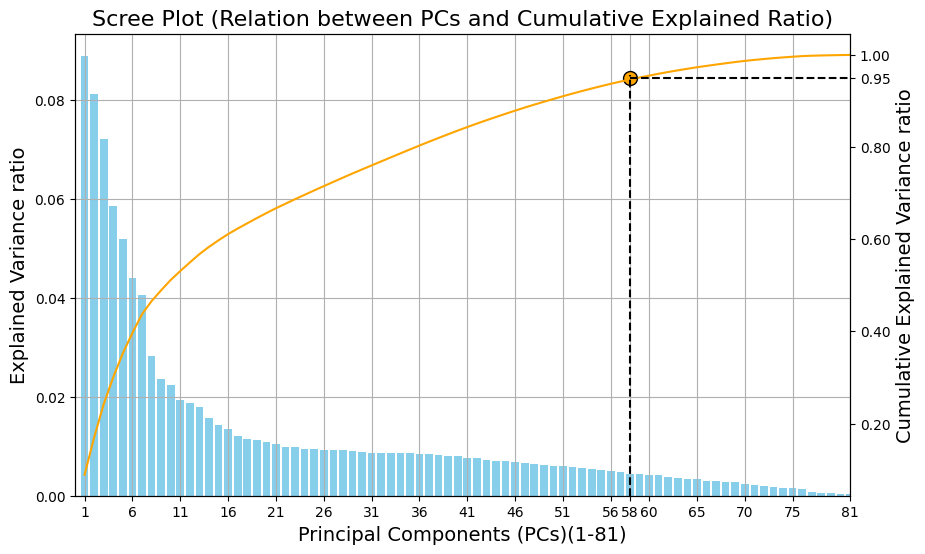

In [15]:
explained_variance_ratio=pca.explained_variance_ratio_
cumulative_variance=np.cumsum(explained_variance_ratio)
Pcs=np.arange(1,len(explained_variance_ratio)+1)
fig,axis_left=plt.subplots(figsize=(10,6))
plt.grid(True)
plt.xlim(0,81)
tick=np.array([i for i in range(1,57,5)]+[58]+ [i for i in range(60,80,5)]+[81])
plt.xticks(tick)
axis_left.bar(Pcs,explained_variance_ratio,width=0.8,color='skyblue')
axis_right=axis_left.twinx()
axis_right.plot(Pcs,cumulative_variance,color='orange')
right_axis_values=np.array([i*0.2 for i in range(1,5,1)]+[0.95]+[1])
axis_right.set_yticks(right_axis_values)
cum_val_y=0.95
cum_val_x=np.where(cumulative_variance>cum_val_y)[0][0]
plt.scatter(cum_val_x,cum_val_y,s=100,c='orange',edgecolor='k')
plt.axhline(y=0.95,xmin=(58/81),xmax=1,linestyle="--",color='black')
plt.axvline(x=58,ymin=0,ymax=0.91,linestyle="--",color='black')
axis_left.set_xlabel("Principal Components (PCs)(1-81)",fontsize=14)
axis_left.set_ylabel("Explained Variance ratio",fontsize=14)
axis_right.set_ylabel("Cumulative Explained Variance ratio",fontsize=14)
axis_left.set_title("Scree Plot (Relation between PCs and Cumulative Explained Ratio)",fontsize=16)
plt.show()




#### Scree Plot Observation
As seen from the scree plot, **58 principal components (PCs)** are required to capture **95% of the total variance** in the dataset.  

#### Cumulative Explained Variance ratio

- To determine the number of principal components, we use the **cumulative explained variance ratio**.  
- By summing the explained variance of each PC, we find the point where the cumulative value reaches **0.95 (95%)**.  
- For the Mushroom dataset, this occurs at around **58 principal components**.

In [16]:
pca_2=PCA(n_components=2)
pca_2_ed=pca_2.fit_transform(df_x)
df_pca_2=pd.DataFrame(pca_2_ed,columns=['Pc1','Pc2'])
df_pca_2.head(5)

,Pc1,Pc2
0,3.284737,1.020105
1,3.969481,-0.856895
2,4.958586,-0.211112
3,3.469967,0.337933
4,2.726570,0.889648


In [17]:
df_merge_labels=pd.concat((df_pca_2,df_y),axis=1)
df_merge_labels.head(5)

,Pc1,Pc2,class_e
0,3.284737,1.020105,0
1,3.969481,-0.856895,1
2,4.958586,-0.211112,1
3,3.469967,0.337933,0
4,2.726570,0.889648,1


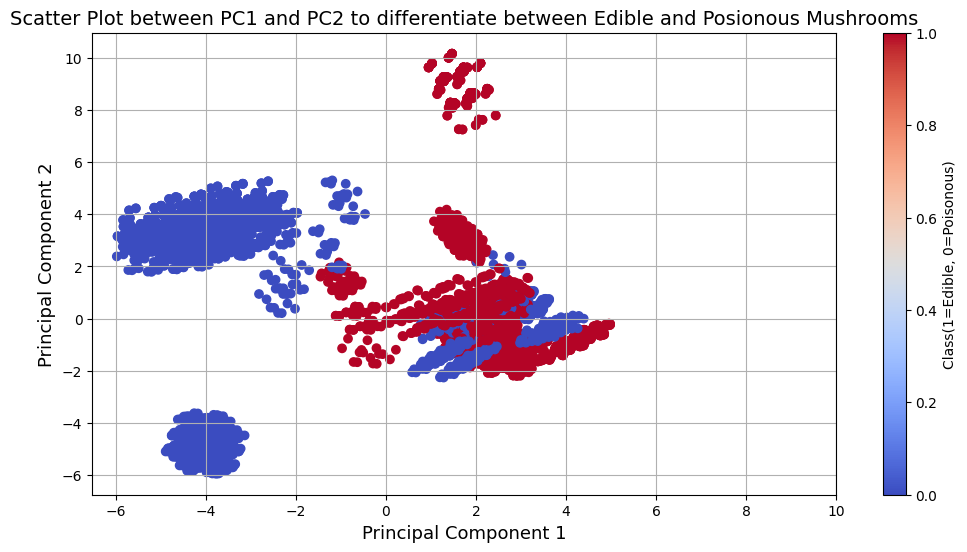

In [18]:
plt.figure(figsize=(12,6))
plt.scatter(df_merge_labels['Pc1'],df_merge_labels['Pc2'],c=df_merge_labels['class_e'],cmap="coolwarm")
plt.colorbar(label='Class(1=Edible, 0=Poisonous)')
plt.xlabel("Principal Component 1",fontsize=13)
plt.ylabel("Principal Component 2",fontsize=13)
plt.xticks(ticks=range(-6,12,2))
plt.grid(True)
plt.title("Scatter Plot between PC1 and PC2 to differentiate between Edible and Posionous Mushrooms",fontsize=14)
plt.show()

#### Visualizing PCA with Scatter Plot

- After PCA, we can take the **first two principal components (PC1 and PC2)**.  
- These two PCs capture the largest portion of variance in the dataset.  
- We then create a **2D scatter plot**:
  - **X-axis:** PC1  
  - **Y-axis:** PC2  
  - **label:** Edible vs Poisonous mushrooms  
- This visualization helps us **observe the separability** between the two classes in reduced dimensions.  

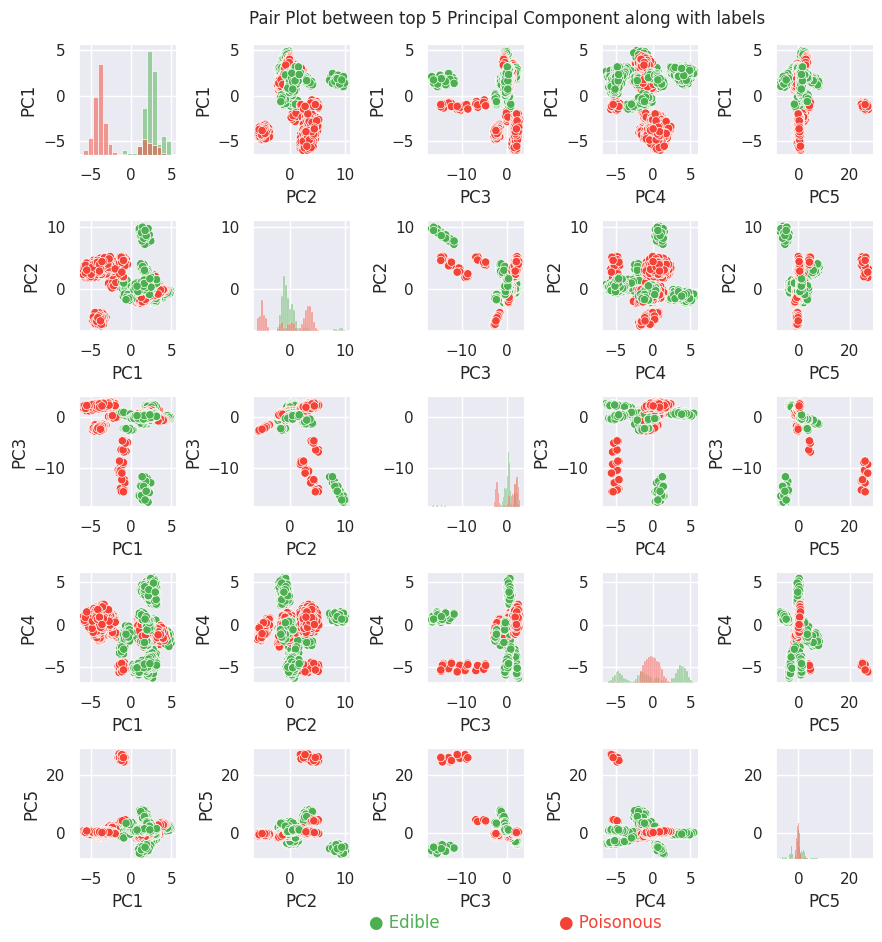

In [27]:
df_pair_plot_ready=pd.concat((df_x_pca[['PC1','PC2','PC3','PC4','PC5']],df_y),axis=1)
df_pair_plot_ready['class_e']=df_pair_plot_ready['class_e'].map({1:'Edible',0:'Poisonous'})
g=sns.pairplot(df_pair_plot_ready,vars=['PC1','PC2','PC3','PC4','PC5'],hue='class_e',palette={'Edible':'#4CAF50','Poisonous':'#F44336'},diag_kind='hist',height=1.8,aspect=1)
sns.set_theme(style="darkgrid")
for elem in g.axes:
    for ax in elem:
        ax.xaxis.label.set_visible(True)
        ax.yaxis.label.set_visible(True)
        ax.xaxis.set_tick_params(labelbottom=True)
        ax.yaxis.set_tick_params(labelleft=True)
g.fig.subplots_adjust(hspace=0.6,wspace=0.8)   
g.fig.suptitle("Pair Plot between top 5 Principal Component along with labels",fontsize=12,y=1.02) 
g._legend.remove()
g.fig.text(0.4, 0.0, "● Edible", color="#4CAF50", fontsize=12, ha="center")
g.fig.text(0.6, 0.0, "● Poisonous", color="#F44336", fontsize=12, ha="center")
plt.show()

#### Pair Plot of First Five Principal Components

- In addition to the 2D scatter plot (PC1 vs PC2), we can also plot a **pair plot** of the **first five principal components**.  
- This shows the relationship between **PC1, PC2, PC3, PC4, and PC5** in pairwise scatter plots.  
- Each point is labeled by class (Edible vs Poisonous) using different colors.  
- The pair plot helps us:
  - Visualize separability across multiple component combinations.  
  - Identify clusters or overlaps beyond just PC1 and PC2.  
- This gives a deeper understanding of how the transformed features represent the mushroom data.  

#### Visualization Analysis: Separability of Edible vs Poisonous Mushrooms

#### Scatter Plot (PC1 vs PC2)  
- **Overlap regions:** Near the center , both classes overlap, leading to  misclassifications.  
- **Interpretation:** The first two PCs capture higher variance than other Pcs.but does not provide strong separated area

#### Pair Plot (Top 5 PCs) 
- **Histograms:** Diagonal plots show different peak ranges for edible vs poisonous.  
- **Low-Seprability:** The feature space of top 5 Pc is not sufficient for a clear seprability


#### Train-Test Split

- After preprocessing, the dataset is divided into **training and testing sets**.  
- We use a **70:30 ratio** (70% training, 30% testing).  
- This split is applied on:  
  1. **Standardized Data** (117 features )  
  2. **PCA-Reduced Data** ( 58 principal components for 95% variance capture)  
- Using the same split for both ensures a **fair comparison** between the performance of models trained on full standardized features vs PCA-reduced features.

In [28]:
top_70=int(df.shape[0]*0.70)
df_x_train=df_x.loc[:top_70,:]
df_x_train.head(5)

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_f,bruises_t,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_a,gill-attachment_f,gill-spacing_c,gill-spacing_w,gill-size_b,gill-size_n,gill-color_b,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stalk-shape_e,stalk-shape_t,stalk-root_?,stalk-root_b,stalk-root_c,stalk-root_e,stalk-root_r,stalk-surface-above-ring_f,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-surface-below-ring_f,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,stalk-color-above-ring_b,stalk-color-above-ring_c,stalk-color-above-ring_e,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,stalk-color-below-ring_b,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-type_p,veil-color_n,veil-color_o,veil-color_w,veil-color_y,ring-number_n,ring-number_o,ring-number_t,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_a,population_c,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,-0.242725,-0.022195,-0.79621,-0.336878,-0.062885,1.105487,-0.632238,-0.022195,1.475942,-0.815325,-0.145314,-0.073794,-0.475867,-0.541117,1.599036,-0.134332,-0.044423,-0.044423,-0.383158,-0.389889,-1.185917,1.185917,-0.227567,-0.155582,-0.601808,-0.227567,-0.066716,-0.876142,5.543859,-0.276246,-0.276246,-0.162896,0.162896,0.438864,-0.438864,-1.494683,1.494683,-0.519778,-0.109353,-0.319386,-0.314684,4.348766,-0.384846,-0.089109,-0.47431,-0.054433,-0.2539,-0.416712,-0.103437,1.144806,-1.144806,-0.662876,-0.931904,-0.271048,2.500714,-0.155582,-0.27,-0.642167,0.754687,-0.054433,-0.282391,-0.629187,0.803659,-0.190327,-0.236986,-0.066716,-0.109353,-0.276246,-0.241586,-0.155582,-0.547197,0.905479,-0.031396,-0.236986,-0.066716,-0.109353,-0.276246,-0.25935,-0.155582,-0.547197,0.923635,-0.054433,0.0,-0.109353,-0.109353,0.15887,-0.031396,-0.066716,0.291438,-0.282391,-0.720467,-0.077094,-0.435668,-0.066716,1.023415,-0.077094,-0.501384,1.827497,-0.565410,-0.077094,-0.094562,-0.077094,-0.645227,-0.077094,-0.222738,-0.208996,-0.227567,2.347257,-0.994599,-0.51672,-0.795385,-0.599531,-0.337783,-0.193088,-0.404842,4.590870,-0.155582
1,-0.242725,-0.022195,-0.79621,-0.336878,-0.062885,1.105487,-0.632238,-0.022195,1.475942,-0.815325,-0.145314,-0.073794,-0.475867,-0.541117,-0.625377,-0.134332,-0.044423,-0.044423,-0.383158,2.564831,-1.185917,1.185917,4.394315,-0.155582,-0.601808,-0.227567,-0.066716,-0.876142,-0.180380,-0.276246,-0.276246,-0.162896,0.162896,0.438864,-0.438864,0.669038,-0.669038,-0.519778,-0.109353,-0.319386,-0.314684,4.348766,-0.384846,-0.089109,-0.47431,-0.054433,-0.2539,-0.416712,-0.103437,1.144806,-1.144806,-0.662876,-0.931904,3.689378,-0.399886,-0.155582,-0.27,-0.642167,0.754687,-0.054433,-0.282391,-0.629187,0.803659,-0.190327,-0.236986,-0.066716,-0.109353,-0.276246,-0.241586,-0.155582,-0.547197,0.905479,-0.031396,-0.236986,-0.066716,-0.109353,-0.276246,-0.25935,-0.155582,-0.547197,0.923635,-0.054433,0.0,-0.109353,-0.109353,0.15887,-0.031396,-0.066716,0.291438,-0.282391,-0.720467,-0.077094,-0.435668,-0.066716,1.023415,-0.077094,-0.501384,-0.547197,1.768629,-0.077094,-0.094562,-0.077094,-0.645227,-0.077094,-0.222738,-0.208996,4.394315

In [29]:
df_x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5687 entries, 0 to 5686
Columns: 117 entries, cap-shape_b to habitat_w
dtypes: float64(117)
memory usage: 5.1 MB


In [30]:
df_x_test=df_x.loc[1+top_70:,:]
df_x_test.head(5)

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_f,bruises_t,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_a,gill-attachment_f,gill-spacing_c,gill-spacing_w,gill-size_b,gill-size_n,gill-color_b,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stalk-shape_e,stalk-shape_t,stalk-root_?,stalk-root_b,stalk-root_c,stalk-root_e,stalk-root_r,stalk-surface-above-ring_f,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-surface-below-ring_f,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,stalk-color-above-ring_b,stalk-color-above-ring_c,stalk-color-above-ring_e,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,stalk-color-below-ring_b,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-type_p,veil-color_n,veil-color_o,veil-color_w,veil-color_y,ring-number_n,ring-number_o,ring-number_t,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_a,population_c,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
5687,-0.242725,-0.022195,-0.79621,2.968433,-0.062885,-0.904579,1.581684,-0.022195,-0.677534,-0.815325,-0.145314,13.551250,-0.475867,-0.541117,-0.625377,-0.134332,-0.044423,-0.044423,-0.383158,-0.389889,0.843230,-0.843230,-0.227567,-0.155582,-0.601808,-0.227567,-0.066716,1.141368,-0.18038,-0.276246,-0.276246,-0.162896,0.162896,-2.278612,2.278612,-1.494683,1.494683,-0.519778,-0.109353,-0.319386,-0.314684,-0.22995,-0.384846,-0.089109,-0.474310,-0.054433,-0.2539,2.399737,-0.103437,1.144806,-1.144806,-0.662876,1.073072,-0.271048,-0.399886,-0.155582,-0.27,-0.642167,0.754687,-0.054433,-0.282391,-0.629187,0.803659,-0.190327,-0.236986,-0.066716,-0.109353,-0.276246,-0.241586,-0.155582,-0.547197,0.905479,-0.031396,-0.236986,-0.066716,-0.109353,-0.276246,3.855799,-0.155582,-0.547197,-1.082678,-0.054433,0.0,-0.109353,-0.109353,0.15887,-0.031396,-0.066716,0.291438,-0.282391,1.387989,-0.077094,-0.435668,-0.066716,-0.977120,-0.077094,-0.501384,-0.547197,-0.56541,-0.077094,-0.094562,-0.077094,1.549842,-0.077094,-0.222738,-0.208996,-0.227567,-0.426029,1.005431,-0.51672,-0.795385,-0.599531,2.960477,-0.193088,-0.404842,-0.217824,-0.155582
5688,-0.242725,-0.022195,-0.79621,-0.336878,-0.062885,1.105487,-0.632238,-0.022195,1.475942,-0.815325,-0.145314,-0.073794,-0.475867,1.848031,-0.625377,-0.134332,-0.044423,-0.044423,-0.383158,-0.389889,-1.185917,1.185917,-0.227567,-0.155582,1.661659,-0.227567,-0.066716,-0.876142,-0.18038,-0.276246,-0.276246,-0.162896,0.162896,0.438864,-0.438864,0.669038,-0.669038,-0.519778,-0.109353,-0.319386,-0.314684,-0.22995,-0.384846,-0.089109,2.108326,-0.054433,-0.2539,-0.416712,-0.103437,-0.873511,0.873511,-0.662876,1.073072,-0.271048,-0.399886,-0.155582,-0.27,-0.642167,0.754687,-0.054433,3.541186,-0.629187,-1.244310,-0.190327,-0.236986,-0.066716,-0.109353,-0.276246,-0.241586,-0.155582,-0.547197,0.905479,-0.031396,-0.236986,-0.066716,-0.109353,-0.276246,-0.259350,-0.155582,-0.547197,0.923635,-0.054433,0.0,-0.109353,-0.109353,0.15887,-0.031396,-0.066716,0.291438,-0.282391,-0.720467,-0.077094,-0.435668,-0.066716,1.023415,-0.077094,1.994478,-0.547197,-0.56541,-0.077094,-0.094562,-0.077094,-0.645227,-0.077094,-0.222738,-0.208996,-0.

In [31]:
df_x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2437 entries, 5687 to 8123
Columns: 117 entries, cap-shape_b to habitat_w
dtypes: float64(117)
memory usage: 2.2 MB


 Data  has been splitted for Train-Test for Standarized 

In [32]:
df_y_train=df_y.loc[:top_70]
df_y_train.head(5)

0    0
1    1
2    1
3    0
4    1
Name: class_e, dtype: int64

In [33]:
df_y_train.info()

<class 'pandas.core.series.Series'>
RangeIndex: 5687 entries, 0 to 5686
Series name: class_e
Non-Null Count  Dtype
--------------  -----
5687 non-null   int64
dtypes: int64(1)
memory usage: 44.6 KB


In [34]:
df_y_test=df_y.loc[top_70+1:]
df_y_test.head(5)

5687    1
5688    0
5689    0
5690    0
5691    1
Name: class_e, dtype: int64

The **labels (y)** are also divided into **training (y_train)** and **testing (y_test)** sets along with the features. 

In [35]:
df_y_test.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2437 entries, 5687 to 8123
Series name: class_e
Non-Null Count  Dtype
--------------  -----
2437 non-null   int64
dtypes: int64(1)
memory usage: 19.2 KB


In [36]:
from sklearn.linear_model import LogisticRegression

The **Logistics Regression** library has been imported from **sklearn.linear_model**

In [37]:
model1=LogisticRegression()
model1.fit(df_x_train,df_y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


#### Logistic Regression Model on Standardized Data

- A **Logistic Regression model** is trained using the **standardized dataset** (117 features after one-hot encoding and StandardScaler).  
- The model is fitted on the **training set (X_train_std, y_train)**.

In [38]:
y_predic_model1=model1.predict(df_x_test)

In [39]:
from sklearn.metrics import classification_report,accuracy_score

#### Prediction on Test Data

- The trained Logistic Regression model is used to make predictions on the **test set (X_test_std)**.  
- The predicted labels (**y_pred**) are then compared with the actual test labels (**y_test**).

In [40]:
print("classification report for Standarized data")
print(classification_report(df_y_test,y_predic_model1))

classification report for Standarized data
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1828
           1       1.00      0.81      0.90       609

    accuracy                           0.95      2437
   macro avg       0.97      0.91      0.93      2437
weighted avg       0.96      0.95      0.95      2437



#### Classification Report – Standardized Data

| Class | Precision | Recall | F1-Score | Support |
|-------|-----------|--------|----------|---------|
| 0 (Edible)   | 0.94 | 1.00 | 0.97 | 1828 |
| 1 (Poisonous)| 1.00 | 0.81 | 0.90 | 609  |

**Observations:**
- The model performs very well on **edible mushrooms** (high recall of 1.00).  
- For **poisonous mushrooms**, precision is perfect (1.00), but recall is lower (0.81), meaning some poisonous mushrooms are misclassified as edible.  
- Overall, the model achieves strong performance, but improving recall for the poisonous class is critical since misclassifying poisonous mushrooms can have serious implications.  

In [41]:
print("Accuracy report for standarized data")
print(accuracy_score(df_y_test,y_predic_model1))

Accuracy report for standarized data
0.9528108329913828


#### Accuracy – Standardized Data

- **Overall Accuracy:** `0.9528` (≈ 95.28%)  

In [42]:
df_x_pca_train=df_x_pca.iloc[:1+top_70,:58]
df_x_pca_train.head(5)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58
0,3.284737,1.020105,1.353591,-1.361726,-0.478375,-0.486227,-2.988416,-1.085874,4.908155,4.233882,-1.561323,-2.155864,-1.223383,-3.001372,-1.008124,2.474360,0.094191,-0.065199,1.462391,0.411088,-0.977218,1.012120,0.522842,-0.651885,0.626252,-1.039469e-14,-1.759904,-0.298708,1.712081e-14,-0.213257,3.097535e-14,1.748044e-14,5.868503e-15,-2.904050e-14,0.006807,0.637247,-0.461234,0.271021,0.833801,0.556621,1.541009,0.472998,0.742095,-0.231228,-0.344674,-0.499488,-1.319541,1.413750,1.306765,0.818898,0.110717,0.273166,-0.478031,-1.194592,0.696284,0.685543,0.592376,0.082934
1,3.969481,-0.856895,-0.237503,-1.903058,1.281135,-2.193247,-4.367826,-0.494000,-0.960146,-1.858999,-1.168269,-1.876365,1.787589,-0.266192,-0.316300,0.258171,0.444621,-0.034301,-1.966128,0.177923,-0.427526,0.040704,1.334999,-0.154129,0.036570,2.080045e-14,-1.224919,-1.143954,3.268164e+00,0.303026,-5.181007e-14,-4.659137e-14,1.136976e-14,5.993156e-14,0.372312,-0.175321,-1.038498,-0.440208,-1.261919,-0.914380,1.537730,1.114419,0.605442,0.402342,-0.265894,-1.692688,-2.490541,1.712418,1.051422,-1.105936,-0.880207,-0.254808,0.953946,-0.626160,-1.015111,-1.696877,0.755927,-0.142432
2,4.958586,-0.211112,-0.466430,-1.557341,1.971429,-3.363282,-5.567695,-0.925606,-2.946658,-1.862181,-2.333472,-0.671347,2.208919,-0.814895,0.460215,-1.142367,-0.202021,0.731015,-1.894874,-0.457165,0.129356,0.407495,-0.502944,-0.192124,0.179794,-2.270712e-15,1.927223,0.807254,-3.268164e+00,-0.691778,-1.831276e-13,-1.663036e-13,-3.815887e-15,2.759673e-13,2.166486,-0.610759,-0.066528,-1.022673,-0.753301,0.038075,-0.652744,0.751322,-0.127668,-0.694917,0.275646,2.062162,0.752280,0.727527,-0.144420,0.549405,0.128382,0.293963,-0.654543,0.538701,-0.008122,0.864061,-0.426471,-0.031335
3,3.469967,0.337933,1.334981,-0.881358,-0.008583,-0.638624,-3.126145,-0.874086,4.493688,4.287290,-0.696882,-1.767137,-1.018130,-2.716905,-0.888078,1.947275,0.106270,-1.765362,2.086212,0.624185,-0.099439,-0.361470,-2.824539,-0.639564,0.641055,-1.376859e-14,0.676185,1.223958,1.745005e-15,-0.693088,3.033697e-14,1.453835e-14,-5.483528e-15,-3.494859e-14,-0.107739,0.404512,0.036966,0.068273,0.239486,0.461166,-1.052655,0.336511,-0.009198,-0.603181,-0.307775,0.988875,0.671259,-0.114947,0.837418,1.099858,0.050898,-0.084381,-0.868229,-0.123780,-0.012054,0.538722,0.072981,0.088033
4,2.726570,0.889648,2.051852,-4.117670,-2.710545,2.501482,1.354385,0.029147,-0.451190,-1.160304,-0.178527,-1.704653,0.538260,-0.707541,1.358181,1.461214,0.629767,-0.697154,-1.707190,-0.164482,0.234793,-0.709481,0.618708,-0.140650,-0.163388,1.218746e-14,-0.573395,-1.700825,-1.309672e-14,1.771603,-1.000906e-13,-6.417761e-14,7.219143e-15,1.255411e-13,1.114037,0.470967,-0.712371,0.411634,-0.618424,-0.142916,2.871383,0.356823,1.100262,0.087156,-0.241843,-1.778571,-0.811090,1.283485,-1.144353,-0.250105,0.004522,0.255081,0.919728,-0.395375,0.264421,1.375391,-0.764993,0.110638


In [43]:
df_x_pca_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5687 entries, 0 to 5686
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PC1     5687 non-null   float64
 1   PC2     5687 non-null   float64
 2   PC3     5687 non-null   float64
 3   PC4     5687 non-null   float64
 4   PC5     5687 non-null   float64
 5   PC6     5687 non-null   float64
 6   PC7     5687 non-null   float64
 7   PC8     5687 non-null   float64
 8   PC9     5687 non-null   float64
 9   PC10    5687 non-null   float64
 10  PC11    5687 non-null   float64
 11  PC12    5687 non-null   float64
 12  PC13    5687 non-null   float64
 13  PC14    5687 non-null   float64
 14  PC15    5687 non-null   float64
 15  PC16    5687 non-null   float64
 16  PC17    5687 non-null   float64
 17  PC18    5687 non-null   float64
 18  PC19    5687 non-null   float64
 19  PC20    5687 non-null   float64
 20  PC21    5687 non-null   float64
 21  PC22    5687 non-null   float64
 22  

In [44]:
df_x_pca_test=df_x_pca.iloc[1+top_70:,:58]
df_x_pca_test.head(5)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58
5687,-0.899851,1.825184,0.208503,-1.773558,1.021869,1.404701,1.110817,0.729885,-1.885562,2.402326,1.761695,0.444162,-0.927818,-0.314670,-1.327767,-2.791171,9.454674,2.976430,1.681537,-2.914038,0.475643,-4.247765,0.965789,-0.211026,-0.845502,-3.508401e-14,-0.708579,2.775907,3.344666e-14,-0.334399,-3.356393e-14,-2.533517e-14,-7.838788e-16,5.766850e-14,0.232381,-0.525142,1.008653,0.382341,3.605914,-1.989071,-1.291422,7.419507,0.802598,0.771271,-0.732957,0.133543,-0.970864,0.185568,-1.772805,-0.159472,-0.436925,0.687657,1.461061,-0.313771,1.757334,-0.040889,-0.310887,0.317968
5688,1.144668,-1.618020,0.445404,0.096200,-1.017311,0.353056,-0.251916,-1.020957,2.390772,2.080780,-2.365381,1.425010,0.294630,2.463122,-2.802280,0.970836,-1.045797,0.900553,-0.931927,1.068405,0.305036,-1.155996,1.214289,0.497128,-0.617444,1.449665e-14,1.569652,-0.045218,-2.273564e-14,0.831854,-1.017574e-13,-7.713982e-14,1.741129e-15,1.345146e-13,0.931626,-0.514069,-0.856469,0.168062,-0.296018,0.017307,0.586559,0.704671,0.870236,0.669727,1.819021,0.776010,0.322549,-0.295269,1.840614,1.471544,1.071023,0.106729,0.635495,-0.450009,0.386501,0.546020,1.117548,0.075601
5689,-4.577878,-4.260219,-1.960044,-0.495805,-0.424154,-0.256690,0.241205,-0.118513,0.793224,-0.218089,-0.752138,0.894571,-0.363576,-0.286387,0.427327,-0.512483,1.140234,0.303650,0.772759,-1.724184,-0.084077,-0.360180,-0.826304,-0.976442,-1.715556,-1.625917e-14,0.576150,0.569095,1.381792e-14,1.921105,-1.978856e-13,-1.443655e-13,9.406315e-15,2.366460e-13,1.779180,0.575137,-2.058675,-2.085410,0.205733,1.247942,-0.854003,-0.923726,-0.125404,0.028052,0.070461,-0.246455,0.118546,-0.050879,-0.148754,0.184438,-0.954494,-0.152815,0.155960,-0.508885,-0.064731,0.118535,-0.271115,-0.756534
5690,-4.007675,3.751333,2.133325,0.922267,0.267521,-0.232423,-0.999779,0.041834,-0.321630,-0.455169,0.371341,-0.241855,0.601922,0.388376,0.080748,1.210895,0.300140,-0.844233,0.223479,0.154115,0.959593,-1.502090,-0.601754,-1.315459,-1.529893,2.755039e+00,-0.270953,0.315474,-5.250636e-15,0.022958,7.534895e-14,7.109464e-14,-2.352069e-15,-1.081583e-13,-1.005599,-0.131895,-0.045271,-0.207984,-0.163436,-0.352435,1.062994,0.370693,-1.298682,1.526391,0.624906,0.258367,0.952710,-0.039797,0.938435,0.164127,0.285917,-0.891653,-0.854399,0.023530,-0.187739,-0.060188,-0.387909,-0.092496
5691,1.823732,2.865474,-1.114949,-1.860832,6.751537,-7.636408,9.672299,-0.445871,3.737108,-0.504519,0.531270,-2.970576,1.502193,0.033079,3.915620,-1.583178,-1.024206,-0.340021,0.424667,-0.641217,-0.203110,-0.539624,0.617773,-0.395004,-1.130389,1.077418e-15,0.827112,-0.056124,-3.835588e-15,0.558596,-5.723856e-14,-4.441786e-14,2.028576e-15,8.155730e-14,0.633445,0.077907,0.019668,-0.460208,-0.335674,-0.009669,-0.448607,-0.825868,-0.372567,1.849499,0.246911,1.773965,-1.506427,-1.007140,3.054834,0.069149,0.178284,-1.514626,1.324727,-0.750007,1.627040,-0.389130,-1.113312,5.885164


In [45]:
df_x_pca_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2437 entries, 5687 to 8123
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PC1     2437 non-null   float64
 1   PC2     2437 non-null   float64
 2   PC3     2437 non-null   float64
 3   PC4     2437 non-null   float64
 4   PC5     2437 non-null   float64
 5   PC6     2437 non-null   float64
 6   PC7     2437 non-null   float64
 7   PC8     2437 non-null   float64
 8   PC9     2437 non-null   float64
 9   PC10    2437 non-null   float64
 10  PC11    2437 non-null   float64
 11  PC12    2437 non-null   float64
 12  PC13    2437 non-null   float64
 13  PC14    2437 non-null   float64
 14  PC15    2437 non-null   float64
 15  PC16    2437 non-null   float64
 16  PC17    2437 non-null   float64
 17  PC18    2437 non-null   float64
 18  PC19    2437 non-null   float64
 19  PC20    2437 non-null   float64
 20  PC21    2437 non-null   float64
 21  PC22    2437 non-null   float64
 2

#### Train-Test Split for PCA Data

- After reducing the dataset using **PCA** (e.g., 58 components for 95% variance capture), the transformed features are divided into training and testing sets.  
- The split is done in a **70:30 ratio** (same as standardized data).  
- Resulting datasets:  
  - **X_train_pca, X_test_pca** → PCA-transformed features  
  - **y_train, y_test** → Corresponding labels (same as before)

In [46]:
model2=LogisticRegression()
model2.fit(df_x_pca_train,df_y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [47]:
y_model2_pca_prediction=model2.predict(df_x_pca_test)

#### Logistic Regression Model on PCA Data

- A **Logistic Regression model** is trained using the **PCA-reduced dataset** (e.g., 58 principal components for 95% variance capture).  
- The model is fitted on the **training set (X_train_pca, y_train)**.  
- Predictions are then made on the **test set (X_test_pca)**.  

In [48]:
print("Classification Report for PCA Model:")
print(classification_report(df_y_test,y_model2_pca_prediction))

Classification Report for PCA Model:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1828
           1       1.00      0.75      0.85       609

    accuracy                           0.94      2437
   macro avg       0.96      0.87      0.91      2437
weighted avg       0.94      0.94      0.93      2437



#### Classification Report – PCA Data

| Class | Precision | Recall | F1-Score | Support |
|-------|-----------|--------|----------|---------|
| 0 (Edible)   | 0.92 | 1.00 | 0.96 | 1828 |
| 1 (Poisonous)| 1.00 | 0.75 | 0.85 | 609  |

**Observations:**
- Similar to the standardized model, the PCA-based model achieves **perfect precision (1.00)** for poisonous mushrooms but recall is lower (0.75).  
- Edible mushrooms are classified with **high recall (1.00)** but slightly lower precision (0.92).  
- Overall performance is strong.

In [49]:
print("Accuracy report for PCA Model")
print(accuracy_score(df_y_test,y_model2_pca_prediction))

Accuracy report for PCA Model
0.9363972096840377


#### Accuracy – PCA Data

- **Overall Accuracy:** `0.9364` (≈ 93.64%)  

#### To dive deep into the analyis of the two models. let us first understand the definations of some Classification factors.
- Precision: To understand it in better way . let me divide it in two categories Precision_0 and Precision_1
- Precision_0: it is ratio that indicates the proportion data that has been classified as 0 is actually 0 labelled
- Precision_1: it is ratio that indicates the proportion data that has been classified as 1 is actually 1 labelled
- Recall: it is ratio that indicates how any data point of a particular class are correctly classified
- F1 Factor: it is harmonic mean of Precision and Recall. to be a good model it should be higher . because there can be case when      precison is high and recall is low. if we calculate mean of the parameters F1 and recall. it will give a false indication of model performance. to be a better model F1 score should be high
- Accuracy: it is a ratio that tells about the how much proportion of data is classified correctly.but it can give incorrect            information if the data set is dominant of one particular cateogory.


####  PCA Model vs Standardized Model

| **Class** | **Metric**   | **PCA Model** | **Standardized Model** | **Interpretation** |
|-----------|--------------|---------------|------------------------|---------------------|
| **0**     | Precision    | 0.92          | 0.94                   | Standardized model is slightly more precise in predicting class0 |
|           | Recall       | 1.00          | 1.00                   | Both models capture all actual class 0 samples:no false negative |
|           | F1-Score     | 0.96          | 0.97                   | Balanced performance, with Standardized model a bit stronger. |
|           | Support      | 1828          | 1828                   | Same number of actual class 0 samples. |
| **1**     | Precision    | 1.00          | 1.00                   | Both models predict class 1 with no false positives. |
|           | Recall       | 0.75          | 0.81                   | Standardized model finds more class 1 cases (higher recall). |
|           | F1-Score     | 0.85          | 0.90                   | Standardized model achieves better balance for class 1. |
|           | Support      | 609           | 609                    | Same number of actual class 1 samples. |



####  Accuracy Comparison – PCA vs Standardized Model

| **Model**            | **Accuracy** |
|-----------------------|--------------|
| PCA Model             | 0.936 (93.6%) |
| Standardized Model    | 0.953 (95.3%) |

#### Conclusion
The Standardized model slightly outperforms the PCA model by ~1.7% in accuracy, while also giving better recall and F1-score for class 1 and class 0.However,The Standarized model uses 117 column in total while the PCA model uses only 58 Columns.


#### PCA vs Standardized Model:

Although the number of columns used in the PCA model is nearly **half** of those in the Standardized model, its performance is almost equally good.  
One of the main reasons is **one-hot encoding**.

- One-hot encoding divides a single categorical column into multiple binary columns.  
- For each categorical feature with **k unique values**, it creates **k binary columns**.  
- However, **one of those columns is redundant**, because if you know the first *(k−1)*, the last one can always be inferred.  
- Thus, the number of **redundant columns** created by one-hot encoding equals the number of categorical features.  

In our dataset:
- **Number of categorical features = 23**  
- **Redundant columns created = 23**

PCA is effective here because it reduces dimensionality and automatically removes such redundancy by projecting correlated dummy variables into fewer informative components.  
This explains why PCA achieved nearly the same performance as the Standardized model despite using fewer columns.


 The features veil-type has only one unique value, so it provide **no useful information for classification**.

#### Logistic Regression as a Surrogate Performance Measurement for PCA

#### 1. The reason PCA Needs an Evaluation Metric
- PCA is an **unsupervised** dimensionality reduction method.  
- It chooses components that maximize **variance explained**, but variance ≠ predictive usefulness.  
- Some directions of high variance may not help classification at all.  
- Therefore, we need a **downstream supervised model** (like Logistic Regression) to check if PCA’s transformation preserves *discriminative power*.

#### 2. The reason that Logistic Regression Works Well
- Logistic Regression is **simple, interpretable, and sensitive** to feature space.  
- If PCA removes redundancy and collinearity effectively, Logistic Regression should perform similarly to (or better than) the full-feature model.  
- If PCA loses too much information, Logistic Regression’s accuracy, precision, recall, or F1 will drop.  
- Thus, Logistic Regression serves as a **surrogate evaluator** of how useful the PCA-transformed features are for classification tasks.

#### 3. Usefulness in This Case
- After PCA, the Logistic Regression model still achieved ~93.6% accuracy (vs 95.3% with standardized features).  
- The small performance gap shows PCA **retained most of the discriminative information** while cutting dimensionality almost in half.  
- This confirms PCA effectively handled collinearity from one-hot encoded variables and reduced redundancy without drastically harming predictive power.



#### Summary

- The Mushroom dataset (8,124 samples, 22 categorical features) was preprocessed using **One-Hot Encoding** (117 features) and **StandardScaler**.  
- PCA was applied, reducing the data to **58 components** for 95% variance capture.  
- Logistic Regression models were trained on both **standardized data** and **PCA-reduced data**.  
- **Results:**
  - Standardized Model Accuracy: **95.28%**  
  - PCA Model Accuracy: **93.64%**  
- Both models achieved strong performance, with high precision but relatively lower recall for the poisonous class.  
- PCA reduced dimensionality effectively but with a slight drop in accuracy.  